In [1]:
import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import numpy as np

In [2]:
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [3]:
race = ff1.get_session(2021, 'Monza', 'R')
race.load(telemetry=True)

core           INFO 	Loading data for Italian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5', '99', '88', '47', '9', '44', '33', '10', '22']


In [4]:
laps_ric = race.laps.pick_driver('RIC')
laps_ver = race.laps.pick_driver('VER')

In [5]:
laps_ric.dtypes

Time                  timedelta64[ns]
Driver                         object
DriverNumber                   object
LapTime               timedelta64[ns]
LapNumber                     float64
Stint                         float64
PitOutTime            timedelta64[ns]
PitInTime             timedelta64[ns]
Sector1Time           timedelta64[ns]
Sector2Time           timedelta64[ns]
Sector3Time           timedelta64[ns]
Sector1SessionTime    timedelta64[ns]
Sector2SessionTime    timedelta64[ns]
Sector3SessionTime    timedelta64[ns]
SpeedI1                       float64
SpeedI2                       float64
SpeedFL                       float64
SpeedST                       float64
IsPersonalBest                 object
Compound                       object
TyreLife                      float64
FreshTyre                        bool
Team                           object
LapStartTime          timedelta64[ns]
LapStartDate           datetime64[ns]
TrackStatus                    object
Position    

In [6]:
laps_ric.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
216,0 days 01:03:52.443000,RIC,3,0 days 00:01:37.656000,1.0,1.0,0 days 00:25:09.902000,NaT,NaT,0 days 00:00:29.470000,...,True,McLaren,0 days 01:02:14.632000,2021-09-12 13:03:16.241,26,1.0,False,,False,False
217,0 days 01:05:23.188000,RIC,3,0 days 00:01:30.745000,2.0,1.0,NaT,NaT,0 days 00:00:32.860000,0 days 00:00:29.263000,...,True,McLaren,0 days 01:03:52.443000,2021-09-12 13:04:54.052,67,1.0,False,,False,False
218,0 days 01:06:49.514000,RIC,3,0 days 00:01:26.326000,3.0,1.0,NaT,NaT,0 days 00:00:28.357000,0 days 00:00:29.409000,...,True,McLaren,0 days 01:05:23.188000,2021-09-12 13:06:24.797,1,1.0,False,,False,True
219,0 days 01:08:15.827000,RIC,3,0 days 00:01:26.313000,4.0,1.0,NaT,NaT,0 days 00:00:28.325000,0 days 00:00:29.399000,...,True,McLaren,0 days 01:06:49.514000,2021-09-12 13:07:51.123,1,1.0,False,,False,True
220,0 days 01:09:42.237000,RIC,3,0 days 00:01:26.410000,5.0,1.0,NaT,NaT,0 days 00:00:28.499000,0 days 00:00:29.329000,...,True,McLaren,0 days 01:08:15.827000,2021-09-12 13:09:17.436,1,1.0,True,TRACK LIMITS AT TURN 11,False,True


In [7]:
laps_ric = laps_ric.loc[laps_ric['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]

In [8]:
laps_ric['RaceLapNumber'] = laps_ric['LapNumber'] - 1
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] - 1

In [9]:
full_distance_ver_ric = pd.DataFrame()
summarized_distance_ver_ric = pd.DataFrame()

In [10]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "3"]
    if len(telemetry) != 0:
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_ric = full_distance_ver_ric.append(lap_telemetry)

        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        summarized_distance_ver_ric = summarized_distance_ver_ric.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [11]:
full_distance_ver_ric.head()

,Distance,DistanceToDriverAhead,Lap
3,1.666667,0.000000,323
87,861.829722,39.665278,323
88,877.563056,40.465278,323
89,893.763056,41.198611,323
90,910.096389,42.065278,323


In [12]:
summarized_distance_ver_ric.head()

,Lap,Mean,Median
0,323.0,97.722341,95.148333
1,324.0,86.179987,92.105556
2,325.0,65.469807,65.230972
3,326.0,42.822890,45.767917
4,327.0,43.997267,46.983056


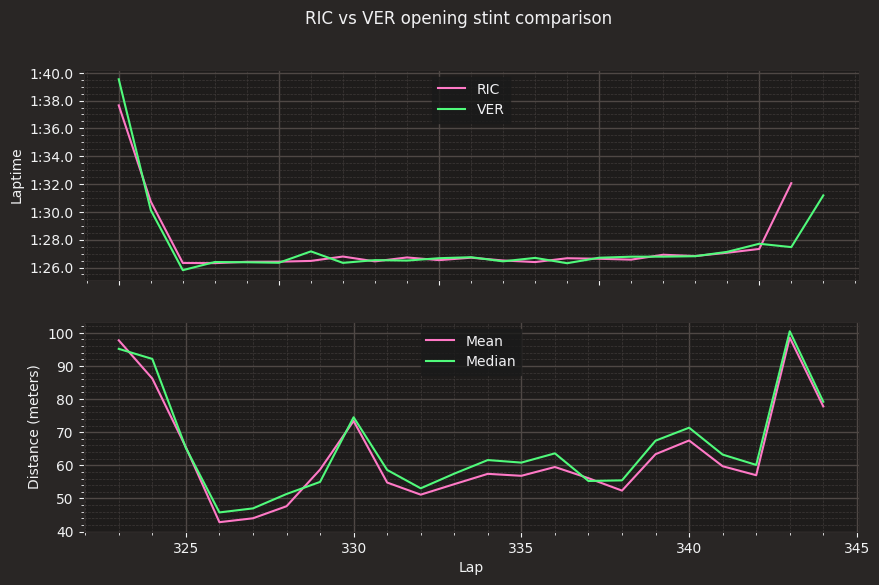

In [13]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(2)
fig.suptitle("RIC vs VER opening stint comparison")

ax[0].plot(laps_ric['RaceLapNumber'], laps_ric['LapTime'], label='RIC')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label='VER')
ax[0].set(ylabel='Laptime', xlabel='Lap')
ax[0].legend(loc="upper center")

ax[1].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Mean'], label='Mean')
ax[1].plot(summarized_distance_ver_ric['Lap'], summarized_distance_ver_ric['Median'], label='Median')
ax[1].set(ylabel='Distance (meters)', xlabel='Lap')
ax[1].legend(loc="upper center")

for a in ax.flat:
    a.label_outer()

plt.show()

In [14]:
lap_telemetry_ric = laps_ric.loc[laps_ric['RaceLapNumber']==4].get_car_data().add_distance()
lap_telemetry_ver = laps_ver.loc[laps_ver['RaceLapNumber']==4].get_car_data().add_distance()

distance_lap3 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==3]
distance_lap4 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==4]
distance_lap5 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==5]
distance_lap6 = full_distance_ver_ric.loc[full_distance_ver_ric['Lap']==6]

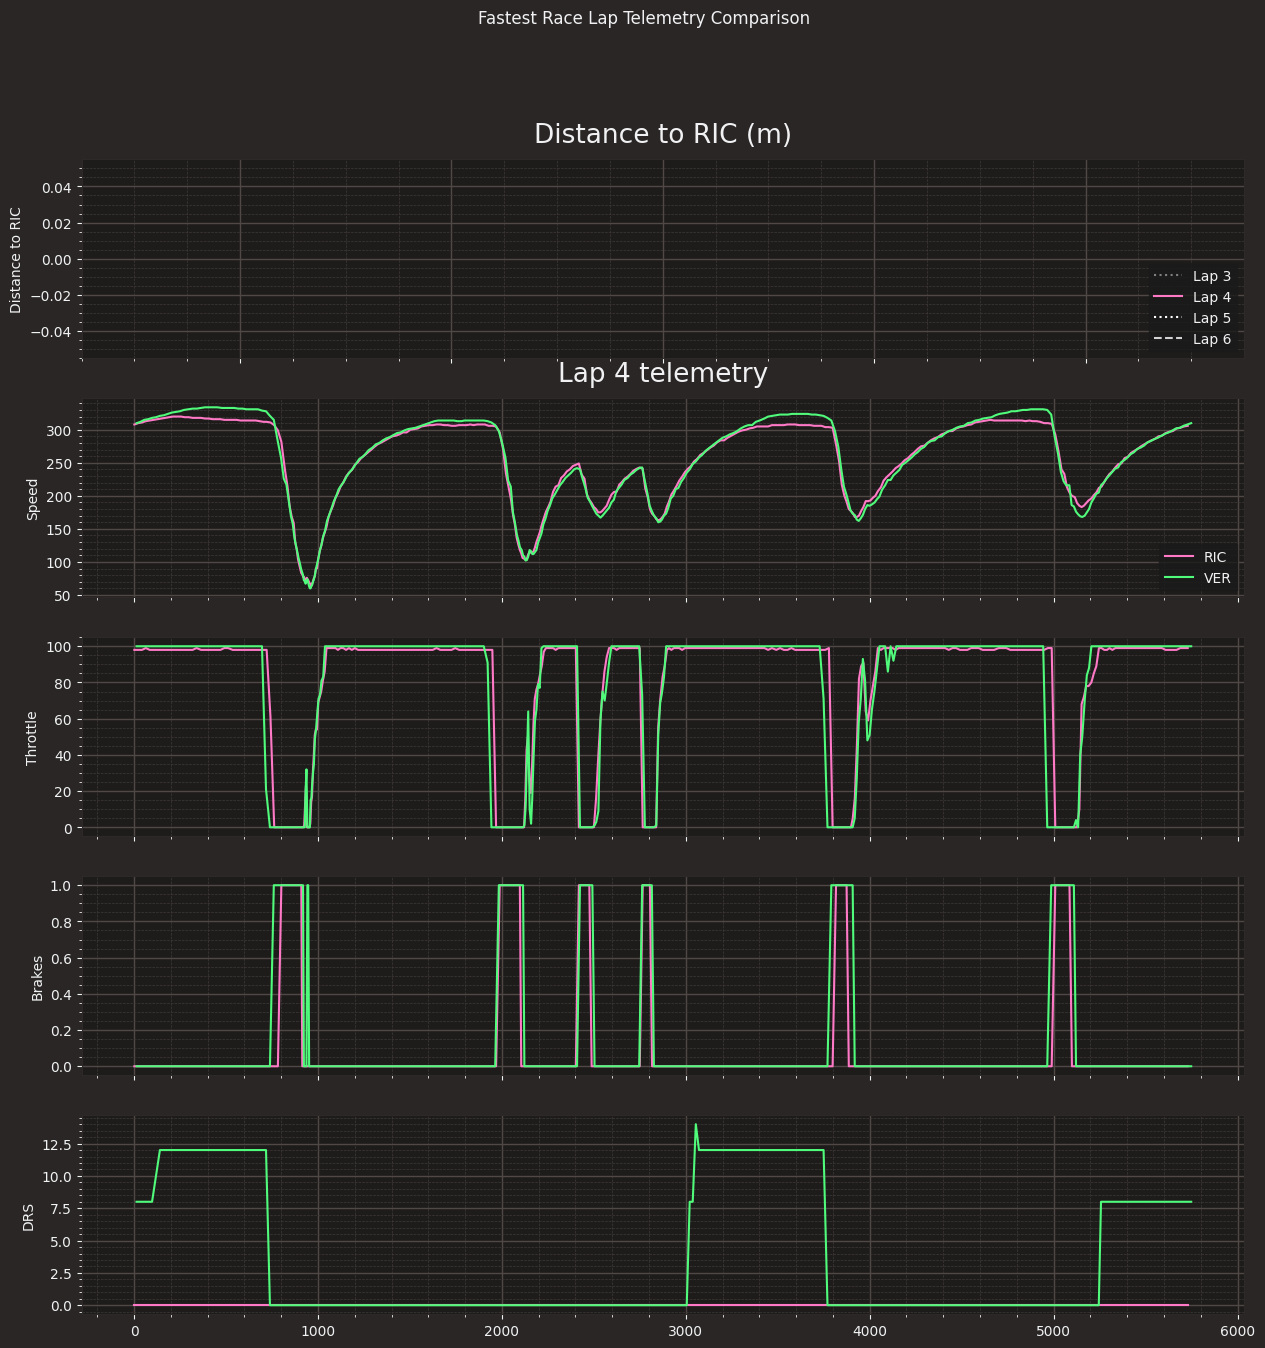

In [15]:
plt.rcParams['figure.figsize'] = [15, 15]

fig, ax = plt.subplots(5)
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].title.set_text("Distance to RIC (m)")
ax[0].plot(distance_lap3['Distance'], distance_lap3['DistanceToDriverAhead'], label='Lap 3', linestyle='dotted', color='grey')
ax[0].plot(distance_lap4['Distance'], distance_lap4['DistanceToDriverAhead'], label='Lap 4')
ax[0].plot(distance_lap5['Distance'], distance_lap5['DistanceToDriverAhead'], label='Lap 5', linestyle='dotted', color='white')
ax[0].plot(distance_lap6['Distance'], distance_lap6['DistanceToDriverAhead'], label='Lap 6', linestyle='dashed', color='lightgrey')
ax[0].legend(loc="lower right")
ax[0].set(ylabel='Distance to RIC')

ax[1].title.set_text("Lap 4 telemetry")
ax[1].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['Speed'], label='RIC')
ax[1].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Speed'], label='VER')
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

ax[2].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['Throttle'], label='RIC')
ax[2].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Throttle'], label='VER')
ax[2].set(ylabel='Throttle')

ax[3].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['Brake'], label='RIC')
ax[3].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['Brake'], label='VER')
ax[3].set(ylabel='Brakes')

ax[4].plot(lap_telemetry_ric['Distance'], lap_telemetry_ric['DRS'], label='RIC')
ax[4].plot(lap_telemetry_ver['Distance'], lap_telemetry_ver['DRS'], label='VER')
ax[4].set(ylabel='DRS')

for a in ax.flat:
    a.label_outer()

plt.show()